In [7]:
import os
import torch
import matplotlib.pyplot as plt

def load_model_weights(model_path):
    """Load model weights from a .pth file."""
    checkpoint = torch.load(model_path, map_location=torch.device("cpu"))
    model_state = checkpoint["student_model_state_dict"]
    return {k: v.cpu().numpy() for k, v in model_state.items() if "weight" in k}

In [8]:
def create_heatmaps(weights_dict):
    num_layers = len(weights_dict)

    # Bigger figure width to give heatmaps more space
    fig, axes = plt.subplots(num_layers, 1, figsize=(10, 1.5 * num_layers))
    if num_layers == 1:
        axes = [axes]

    im = None

    for i, (layer_name, weights) in enumerate(weights_dict.items()):
        ax = axes[i]
        rows, cols = weights.shape

        # Rotate if vertical
        if rows > cols:
            weights = weights.T
            rows, cols = weights.shape

        # Heatmap
        im = ax.imshow(weights, cmap="RdBu", aspect="equal", vmin=-2, vmax=2)

        # Clean, compact labels
        clean_name = f"Layer {int(layer_name.split('.')[1])+1}"
        ax.set_title(f"{clean_name} (dimension {rows}×{cols})", fontsize=11, pad=4)
        ax.invert_yaxis()
        if rows == 1:
            ax.set_yticks([])

    # Tightly pack subplots
    plt.subplots_adjust(left=0.06, right=0.86, top=0.94, bottom=0.06, hspace=0.05)

    # Add slim colorbar on the right
    cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    # Title
    #plt.suptitle(f"{model_name} - Weight Heatmaps", fontsize=13, y=0.985)
    plt.show()

In [ ]:
# compute level of sparsity of model
def compute_sparsity(weights_dict):
    """Compute the sparsity of model weights."""
    sparsity = {}
    for layer_name, weights in weights_dict.items():
        num_elements = weights.size
        num_zeros = (abs(weights) < 1e-4).sum()
        sparsity[layer_name] = num_zeros / num_elements    
    return sparsity

In [23]:
def create_all_heatmaps(directory):
    model_files = [f for f in os.listdir(directory) if f.endswith(".pth")]
    for model_file in model_files:
        model_path = os.path.join(directory, model_file)
        print(f"\nLoading weights from {model_file}...")
        
        weights_dict = load_model_weights(model_path)
        create_heatmaps(weights_dict)
        sparsity = compute_sparsity(weights_dict)
        for layer_name, sparsity_value in sparsity.items():
            print(f"Sparsity of {layer_name}: {sparsity_value * 100:.2f}%")


Loading weights from overlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


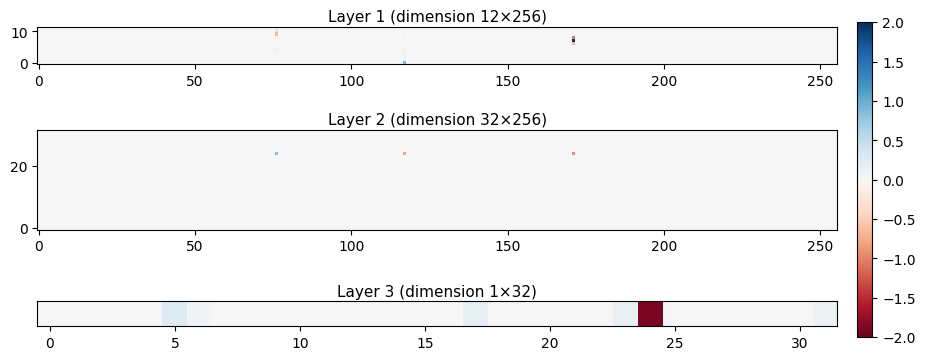

3072 3049 (np.float64(0.9925130208333334),)
8192 8189 (np.float64(0.9996337890625),)
32 0 (np.float64(0.0),)


TypeError: unsupported format string passed to tuple.__format__

In [24]:
directory = "../experiment_output/overlappingTeacher/experiments_26032025_l1_5e-6"
create_all_heatmaps(directory)


Loading weights from overlappingCNN_sigmoid__fcnn_decreasing_sigmoid.pth...


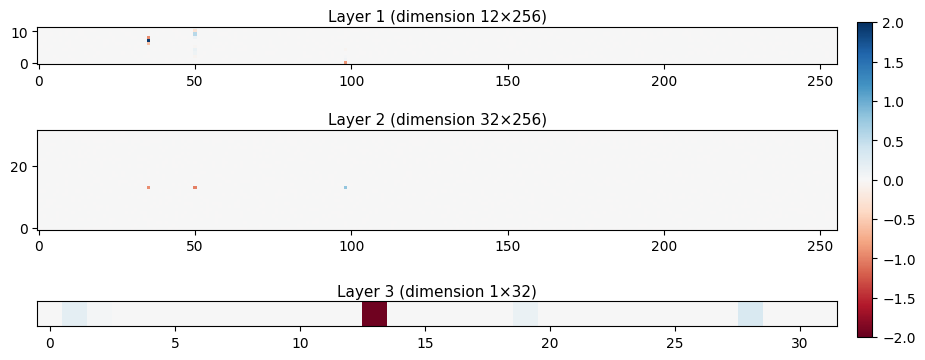

{'layers.0.weight': np.float64(0.994140625), 'layers.1.weight': np.float64(0.9996337890625), 'layers.2.weight': np.float64(0.84375)}

Loading weights from overlappingCNN_tanh__fcnn_decreasing_tanh.pth...


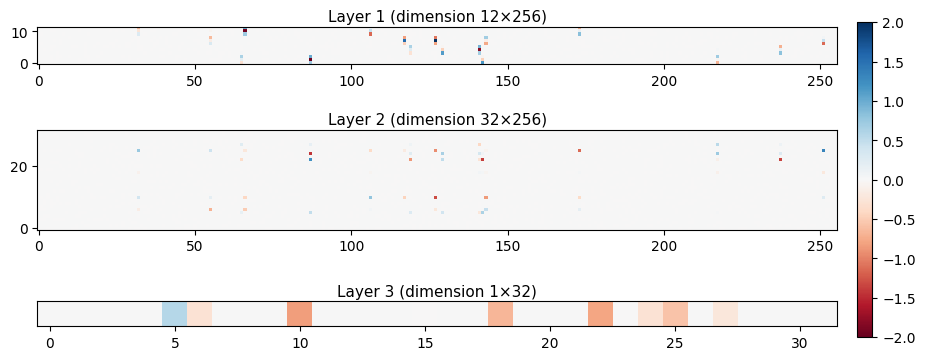

{'layers.0.weight': np.float64(0.9534505208333334), 'layers.1.weight': np.float64(0.9888916015625), 'layers.2.weight': np.float64(0.75)}

Loading weights from overlappingCNN_relu__fcnn_decreasing_relu.pth...


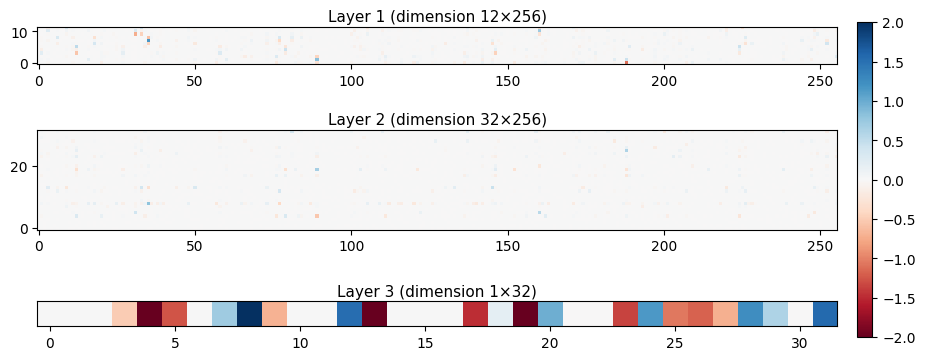

{'layers.0.weight': np.float64(0.5784505208333334), 'layers.1.weight': np.float64(0.86767578125), 'layers.2.weight': np.float64(0.375)}


In [12]:
directory = "../experiment_output/overlappingTeacher/experiments_27032025_l1_1e-5"
create_all_heatmaps(directory)